<a href="https://www.kaggle.com/code/najeebz/binary-classification-deep-learning-pruned?scriptVersionId=159534793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview)
### Playground Series - Season 4, Episode 1
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle.](https://kaggle.com/competitions/playground-series-s4e1)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/binary-classification-deep-learning-cnn-model)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Binary Classification with a Bank Churn Dataset. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/binary-classification-deep-learning-cnn-model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from warnings import filterwarnings;
filterwarnings('ignore');

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Reading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

# Exploratory Data Analysis:

In [3]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [4]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


### Exited column is to be predicted.

In [5]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## No Null values, but there are few categorical columns, should be converted into numbers.

## Let's analyze these

In [7]:
df.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [8]:
df.NumOfProducts.value_counts()


NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [9]:
df.IsActiveMember.describe()

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

In [10]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [11]:
def encoder(df):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtypes=='object':
            df[col]=labelencoder.fit_transform(df[col])
    return df

df=encoder(df)
test=encoder(test)

# Data Wrangling:

## Data Frames with Columns to be used:

In [12]:
train_df=df[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
train_df
test_df=test[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [13]:
def colchange(train_df):
    train_df['Geography']=pd.to_numeric(train_df['Geography'].replace(['France','Spain', 'Germany'],[0,0.5,1]))
    train_df['Gender']=pd.to_numeric(train_df['Gender'].replace(['Male','Female'],[1,0]))
    return(train_df)
#train_df=colchange(train_df)
#test_df=colchange(test_df)
#train_df['Exited']=pd.Categorical(train_df['Exited'])
print(test_df.info())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          110023 non-null  int64  
 1   CreditScore      110023 non-null  int64  
 2   Geography        110023 non-null  int64  
 3   Gender           110023 non-null  int64  
 4   Age              110023 non-null  float64
 5   Tenure           110023 non-null  int64  
 6   Balance          110023 non-null  float64
 7   NumOfProducts    110023 non-null  int64  
 8   HasCrCard        110023 non-null  float64
 9   IsActiveMember   110023 non-null  float64
 10  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 9.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname      

# Pre-Processing for Model:

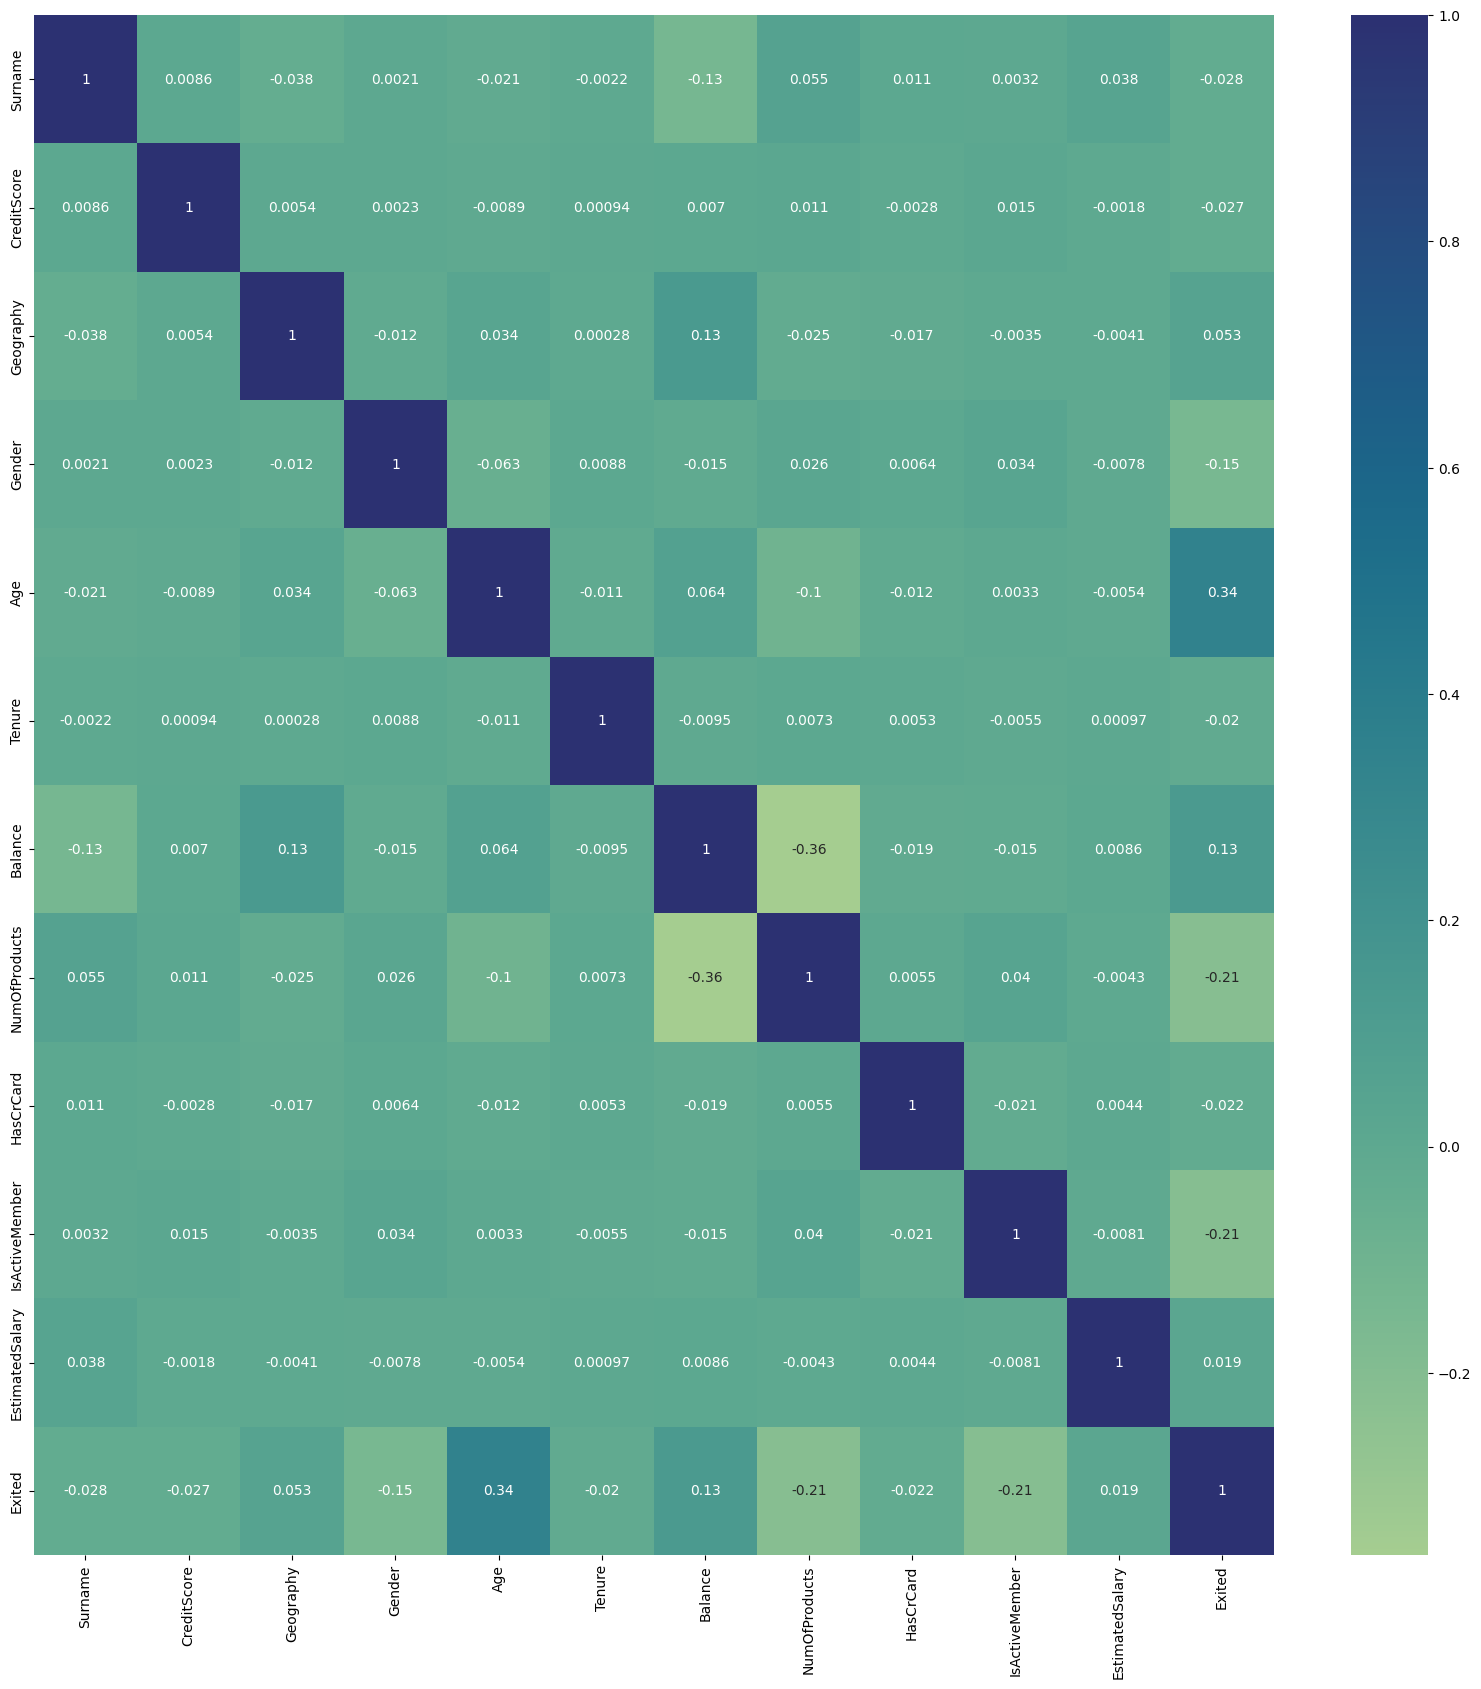

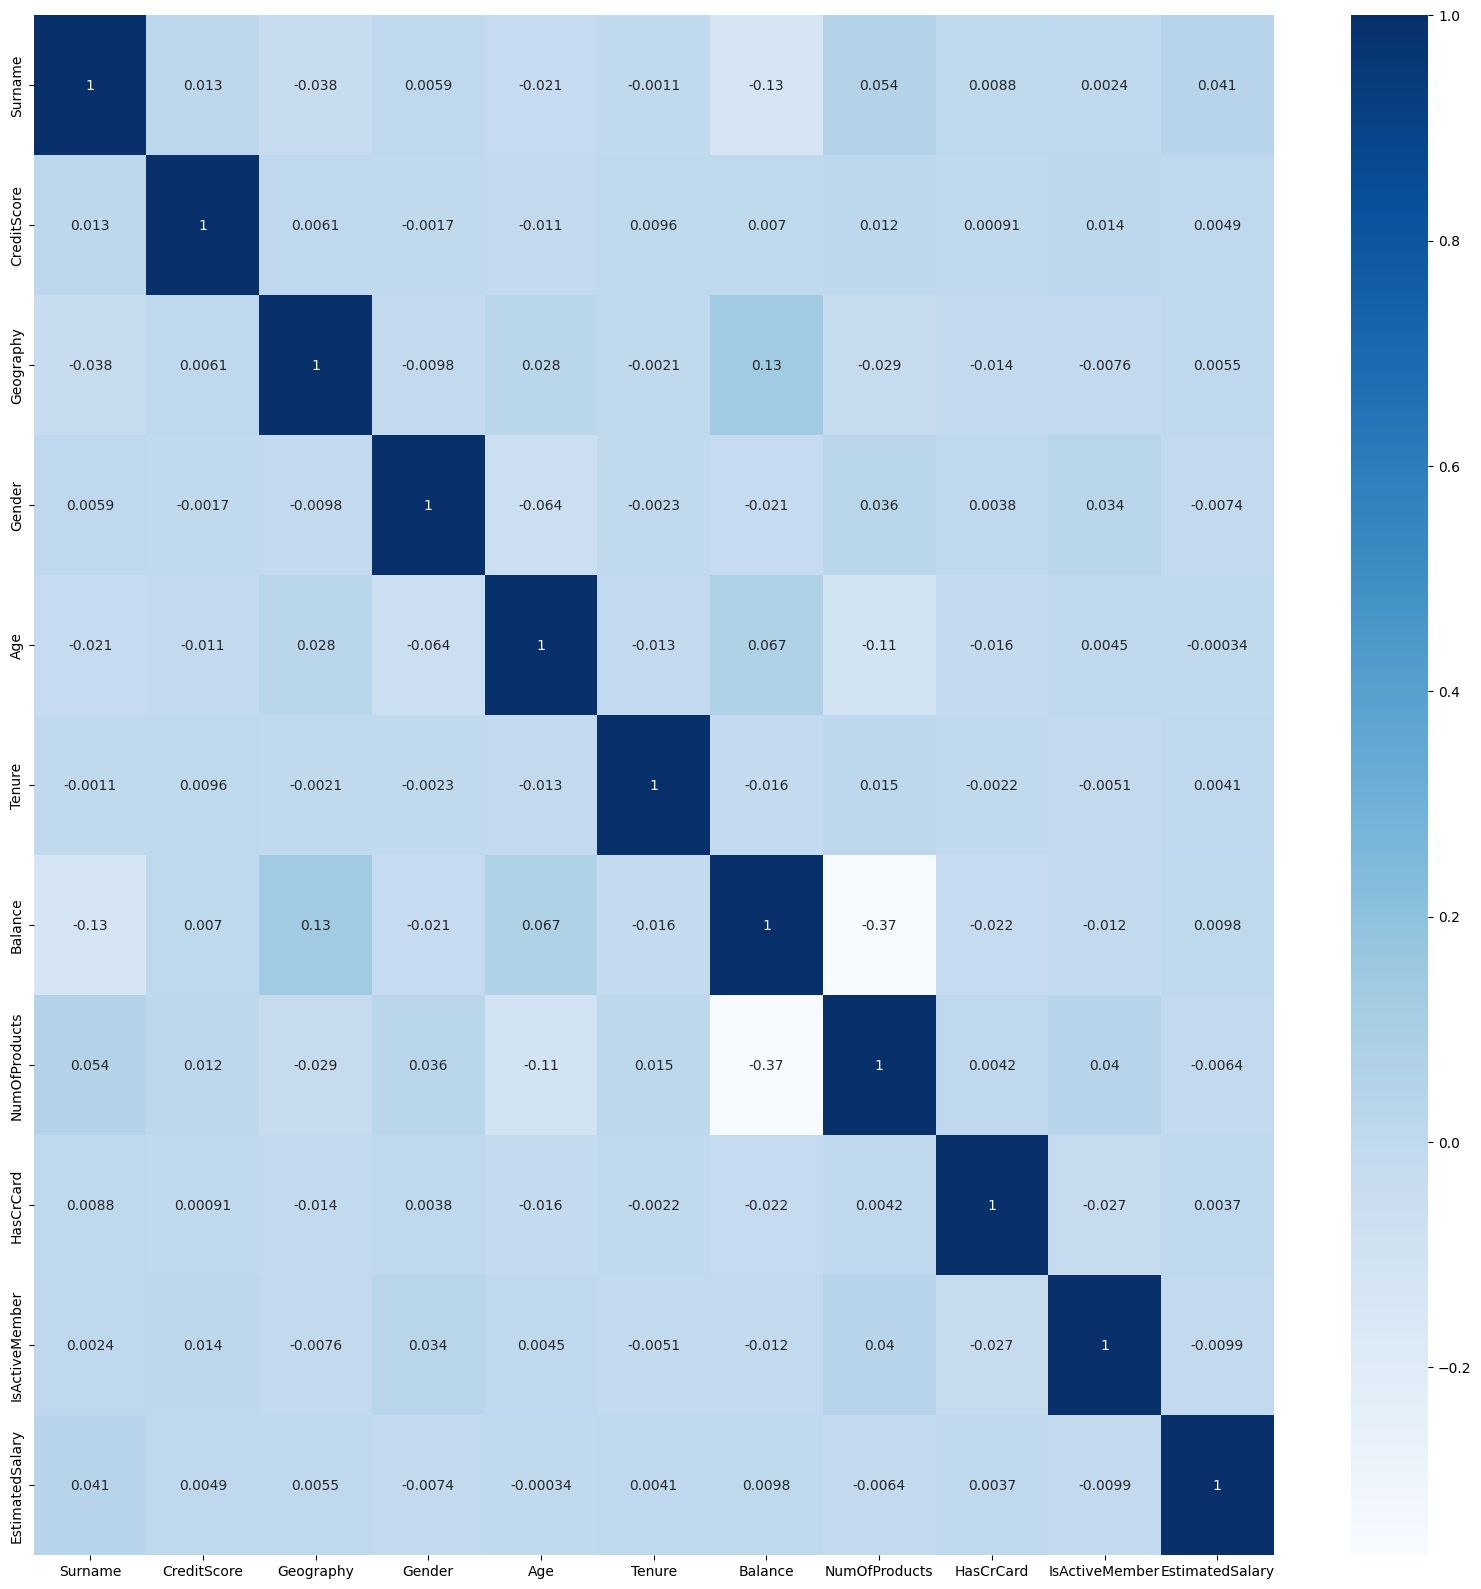

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='crest')
corr = test_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='Blues')

In [15]:
train_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Creating Testing and Training Datasets for Model Training and Evaluation:

## Scaling the Data

In [16]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [17]:
X=train_df.drop(columns=['Exited'])
y=train_df[['Exited']]
print(X.describe())
print(y.describe())

             Surname    CreditScore      Geography         Gender  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean     1547.281948     656.454373       0.648545       0.564429   
std       772.771233      80.103340       0.816574       0.495833   
min         0.000000     350.000000       0.000000       0.000000   
25%       924.000000     597.000000       0.000000       0.000000   
50%      1589.000000     659.000000       0.000000       1.000000   
75%      2186.000000     710.000000       1.000000       1.000000   
max      2796.000000     850.000000       2.000000       1.000000   

                 Age         Tenure        Balance  NumOfProducts  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean       38.125888       5.020353   55478.086689       1.554455   
std         8.867205       2.806159   62817.663278       0.547154   
min        18.000000       0.000000       0.000000       1.000000   
25%        32.000000       3.0000

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)
X.keys()
test_df=scale(test_df)

# Function to visualize the Model Learning:

In [19]:
def plot_history(history):
    hist1=pd.DataFrame(history.history)
    hist1['epoch']=history.epoch
    print(hist1.columns)
#hist1=hist.tail(550)
#'loss', 'mae', 'mse', 'binary_crossentropy', 'binary_accuracy','val_loss', 'val_mae', 'val_mse', 'val_binary_crossentropy','val_binary_accuracy', 'epoch'
#sns.lineplot(data=histsamp, y='val_mse', x='epoch')
    if hist1.columns.isin(['binary_crossentropy','val_binary_crossentropy']).any():
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('binary_crossentropy')
        plt.plot(hist1['epoch'],hist1['binary_crossentropy'], label='binary_crossentropy')
        plt.plot(hist1['epoch'], hist1['val_binary_crossentropy'], label='binary_crossentropy')
        plt.legend()
#plt.ylim([0, 0.2])
    if hist1.columns.isin(['mse', 'val_mse']).any():
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Mean Square Error')
        plt.plot(hist1['epoch'],hist1['mse'], label='Train Error')
        plt.plot(hist1['epoch'], hist1['val_mse'], label='Val_Error')
        plt.legend()
    if hist1.columns.isin(['binary_accuracy','val_binary_accuracy'] ).any():
        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Binary Accuracy')
        plt.plot(hist1['epoch'],hist1['binary_accuracy'], label='Binary Accuracy')
        plt.plot(hist1['epoch'], hist1['val_binary_accuracy'], label='Val Binary Accuracy')
        plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist1['epoch'],hist1['loss'], label='Loss')
    plt.plot(hist1['epoch'], hist1['val_loss'], label='Val Loss')
    plt.legend()

# Creating the Model:

In [20]:
import tensorflow as tf
tf.random.set_seed(42)
epoch=200
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',
                                            min_delta=0.0001,
                                            patience=5,
                                            start_from_epoch=2,
                                            )
model=tf.keras.Sequential([
  tf.keras.layers.Dense(256,activation='relu', input_shape=[len(X.keys())]),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.experimental.Adamax() , loss='mae', metrics=['mae','mse','binary_crossentropy','binary_accuracy'])
history=model.fit(X_train,y_train, epochs=epoch, validation_split=0.2)


Epoch 1/200
3301/3301 [==============================] - 11s 3ms/step - loss: 0.1748 - mae: 0.1748 - mse: 0.1624 - binary_crossentropy: 1.7642 - binary_accuracy: 0.8275 - val_loss: 0.1587 - val_mae: 0.1587 - val_mse: 0.1500 - val_binary_crossentropy: 2.5622 - val_binary_accuracy: 0.8425
Epoch 2/200
3301/3301 [==============================] - 10s 3ms/step - loss: 0.1574 - mae: 0.1574 - mse: 0.1497 - binary_crossentropy: 2.9109 - binary_accuracy: 0.8436 - val_loss: 0.1547 - val_mae: 0.1547 - val_mse: 0.1483 - val_binary_crossentropy: 3.3723 - val_binary_accuracy: 0.8460
Epoch 3/200
3301/3301 [==============================] - 10s 3ms/step - loss: 0.1555 - mae: 0.1555 - mse: 0.1494 - binary_crossentropy: 3.6525 - binary_accuracy: 0.8450 - val_loss: 0.1546 - val_mae: 0.1546 - val_mse: 0.1492 - val_binary_crossentropy: 3.9742 - val_binary_accuracy: 0.8459
Epoch 4/200
3301/3301 [==============================] - 9s 3ms/step - loss: 0.1545 - mae: 0.1545 - mse: 0.1490 - binary_crossentropy: 4

## Pruning the Model:

In [21]:
#!pip install tensorflow_model_optimization


In [22]:
def prune_model(model, X,y):
    from tensorflow_model_optimization.sparsity import keras as sparsity
# Define the pruning schedule, e.g., from 50% to 80% sparsity
    pruning_schedule = sparsity.PolynomialDecay(initial_sparsity=0.50,
                                           final_sparsity=0.80,
                                           begin_step=0,
                                           end_step=1000)
# Apply pruning to the entire model
    print(model.summary())
    pruned_model = sparsity.prune_low_magnitude(model, pruning_schedule=pruning_schedule)
    print('Pruning Model')
    print(pruned_model.summary())

# Train the model as usual
    model.compile(optimizer='Adadelta', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.fit(X,y, epochs=2)
# Finally, make sure to strip the pruning wrappers for final inference
    final_model = sparsity.strip_pruning(pruned_model)
    final_model.compile(optimizer='SGD', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['mae','mse','binary_accuracy'])
    print('Summary of Pruned Model: \n')
    print(final_model.summary())
    return final_model



In [23]:
y['Exited'].mean()-1

-0.7884011779390914

In [24]:
#final_model=prune_model(model, X,y)

# Starting the Training:

In [25]:

epoch=4
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',
                                            min_delta=0.0001,
                                            patience=5,
                                            start_from_epoch=2,
                                            mode='max')
#history=final_model.fit(X_train,y_train, epochs=epoch, validation_split=0.1)
#history=model.fit(X,y, epochs=epoch, validation_split=0.2,callbacks=[early_stop])


Index(['loss', 'mae', 'mse', 'binary_crossentropy', 'binary_accuracy',
       'val_loss', 'val_mae', 'val_mse', 'val_binary_crossentropy',
       'val_binary_accuracy', 'epoch'],
      dtype='object')


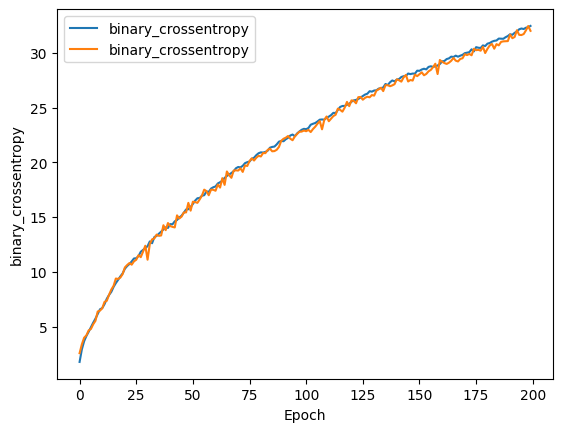

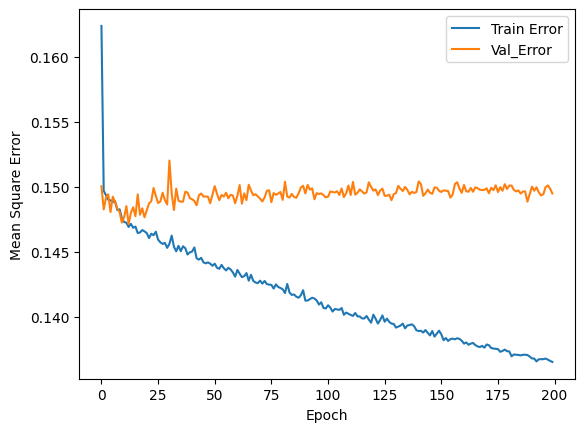

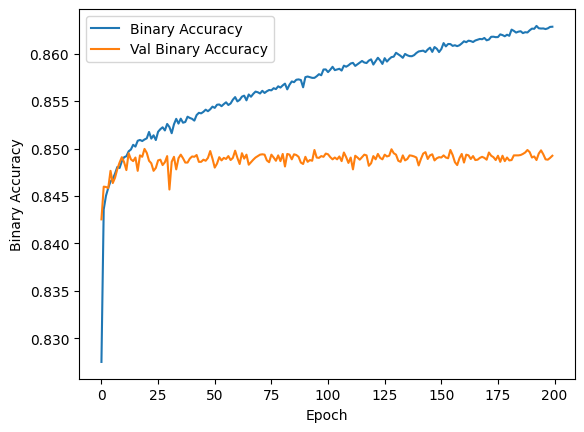

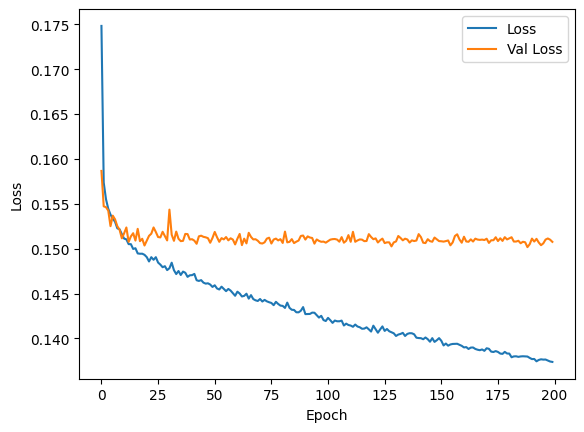

In [26]:
plot_history(history)


In [27]:

print('Test accuracy:', model.evaluate(X_test,y_test))


1032/1032 [==============================] - 2s 2ms/step - loss: 0.1527 - mae: 0.1527 - mse: 0.1513 - binary_crossentropy: 32.3504 - binary_accuracy: 0.8474
Test accuracy: [0.15269255638122559, 0.15269255638122559, 0.15134525299072266, 32.35041427612305, 0.8473960161209106]


# Preparing the submission

In [28]:
y_pred=model.predict(X_test)
print('Predictions:', y_pred)
result=model.predict(scale(test_df))

1032/1032 [==============================] - 1s 1ms/step
Predictions: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
3439/3439 [==============================] - 4s 1ms/step


## Creating the submission file:

In [29]:
submission=pd.DataFrame(columns=['id','Exited'])
submission['id']=test[['id']]
submission['Exited']=np.round_(result, decimals = 1)

In [30]:
submission.to_csv('submission.csv',index=False)

In [31]:
submission['Exited'].value_counts()

Exited
0.0    94498
1.0    14774
0.1      148
0.9      144
0.2       80
0.3       73
0.8       71
0.7       70
0.4       57
0.5       54
0.6       54
Name: count, dtype: int64